#  Exercise 1: 1) compute maximum length of a codeword with Huffman coding

https://www.coursera.org/learn/algorithms-greedy/exam/u4WGg/programming-assignment-3

In [12]:
uploaded_vertices = open('/Users/nicolas/huffman.txt', 'r')
data = uploaded_vertices.read()

weights = [int(x) for x in data.split('\n')[1:-1]]

In [49]:
import pandas as pd

costs = []
in_edges = []
out_edges = []
for line in data.split('\n')[1:]:
    in_edges.append(int(line.split()[0]))
    out_edges.append(int(line.split()[1]))
    costs.append(int(line.split()[2]))


df = pd.DataFrame({"source": in_edges, "target": out_edges, "cost": costs})
df.head()

,source,target,cost
0,1,2,6808
1,1,3,5250
2,1,4,74
3,1,5,3659
4,1,6,8931


## Display graph plot

/Users/nicolas/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


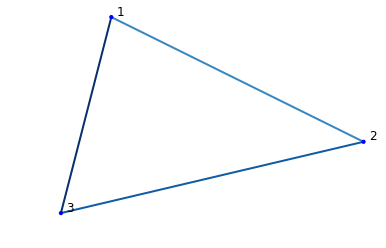

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx


def plot_graph(df, directed=False):
    graph_engine = nx.DiGraph() if directed else None
    G = nx.from_pandas_edgelist(df, source='source', target='target', edge_attr=True, create_using=graph_engine)
    costs = G.edges.data('cost')

    pos = nx.layout.spring_layout(G, random_state=42)
    pos_labels = nx.layout.spring_layout(G, center=(0.05,0.05), random_state=42)

    node_sizes = [10 for i in range(len(G))]
    M = G.number_of_edges()
    edge_colors = [x[2] for x in G.edges.data('cost')]


    nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='blue')
    labels = nx.draw_networkx_labels(G, pos=pos_labels)
    edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes, arrowstyle='->',
                                   arrowsize=10, edge_color=edge_colors,
                                   edge_vmin=0., edge_cmap=plt.cm.Blues, width=2)

    # set alpha value for each edge
    if directed:
        edge_alphas = [0.5 for i in range(M)]
        for i in range(M):
            edges[i].set_alpha(edge_alphas[i])

        pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.Blues)
        pc.set_array(edge_colors)
        plt.colorbar(pc)

    ax = plt.gca()
    ax.set_axis_off()
    plt.show()
    
df = pd.DataFrame({"source": [1, 2, 3], "target": [2, 3, 1], "cost": [4, 5, 6]})
plot_graph(df)

## Compute 4-clusters clustering

In [52]:
from copy import deepcopy

# df = pd.DataFrame({"source": [1, 2, 3, 4, 4], "target": [2, 3, 1, 1, 3], "cost": [4, 5, 6, 7, 8]})

n_nodes = len(df)
K = 4  # Desired number of clusters

# Relabel nodes
df['source'] = df['source'] - 1
df['target'] = df['target'] - 1

df_remaining = deepcopy(df)
# df_remaining['inter_cluster'] = False

# assigned_clusters = pd.Series(range(n_nodes))
# clusters_mapper = {k: k for k in range(n_nodes)}

In [53]:
from time import time

t0 = time()

i = 0
while len(set(df_remaining['target'].unique()) | set(df_remaining['source'].unique())) > K:
    i += 1
    if i % 100 == 0:
        print("Number of remaining edges: {}".format(len(df_remaining)))
        print(time() - t0)
        print('-'*40)
    min_row = df_remaining.loc[df_remaining['cost'].idxmin()]
    source = min_row['source']
    target = min_row['target']

    df_remaining['target'].replace(source, target, inplace=True)
    df_remaining['source'].replace(source, target, inplace=True)
    df_remaining = df_remaining[df_remaining['target'] != df_remaining['source']]
    
print("Maximum spacing: {}".format(df_remaining["cost"].min()))

Number of remaining edges: 124592
8.077739953994751
----------------------------------------
Number of remaining edges: 124019
16.105456829071045
----------------------------------------
Number of remaining edges: 116118
24.08658719062805
----------------------------------------
Number of remaining edges: 56439
31.975100994110107
----------------------------------------
Maximum spacing: 106


In [41]:
from time import time

t0 = time()

i = 0
while assigned_clusters.nunique() > 2:
    i += 1
    if i % 10000 == 0:
        print("Number of remaining edges: {}".format(len(df_remaining)))
        print(time() - t0)
        print('-'*40)
    # 1) find one minimum cost edge among inter-cluster edges (breaking ties arbitrarily)
    min_row = df.loc[df['cost'].idxmin()]
    
    source_cluster = int(assigned_clusters[min_row['source']])
    target_cluster = int(assigned_clusters[min_row['target']])
    
    source_cluster_mask = (df['source'] == source_cluster)
    assigned_clusters[source_cluster_mask] = target_cluster
    
    # 2) remove intra-cluster edges 
#     print(time() - t0)
#     clusters_mapper = {k: assigned_clusters[k] for k in range(n_nodes)}
#     print(time() - t0)
#     source_clusters_series = df_remaining["source"].map(clusters_mapper)
#     target_clusters_series = df_remaining["target"].map(clusters_mapper)
#     print(time() - t0)
#     df_remaining = df_remaining[source_clusters_series != target_clusters_series]
    df_remaining = df_remaining[df_remaining['source'] == target_cluster]


print("Maximum spacing: {}".format(df_remaining["cost"].min()))

KeyboardInterrupt: 